In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sadanandrajpurohit/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sadanandrajpurohit/nltk_data...


True

In [1]:
%pip install wordcloud nltk

  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.6 MB/s eta 0:00:00a 0:00:01
Using cached click-8.2.1-py3-none-any.whl (102 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [wordcloud]/5 [wordcloud]
Note: you may need to restart the kernel to use updated packages.


In [3]:
# 1. Load Dataset
df = pd.read_csv('/Users/sadanandrajpurohit/vscodes/spam.csv', encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'text']

In [4]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


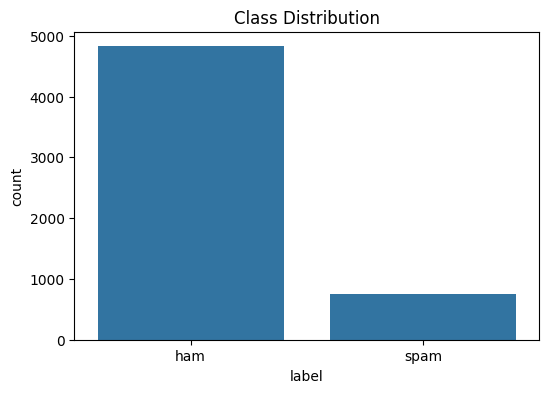

In [5]:
# 2. EDA
# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.show()

In [6]:
# Word frequencies
def plot_wordcloud(label):
    text = ' '.join(df[df['label']==label]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {label}')
    plt.show()

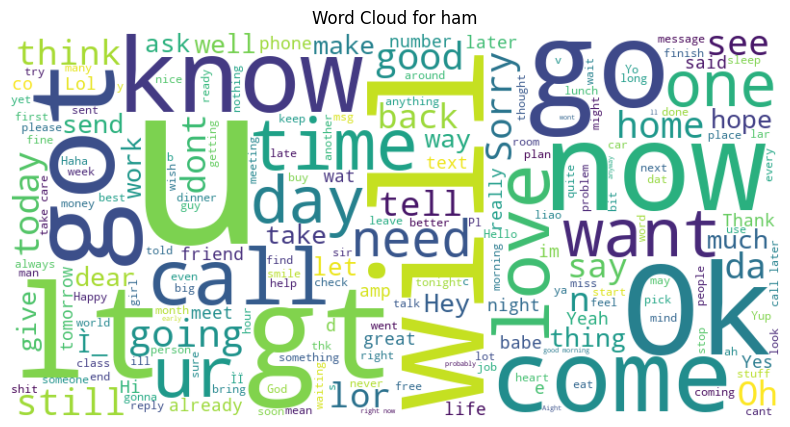

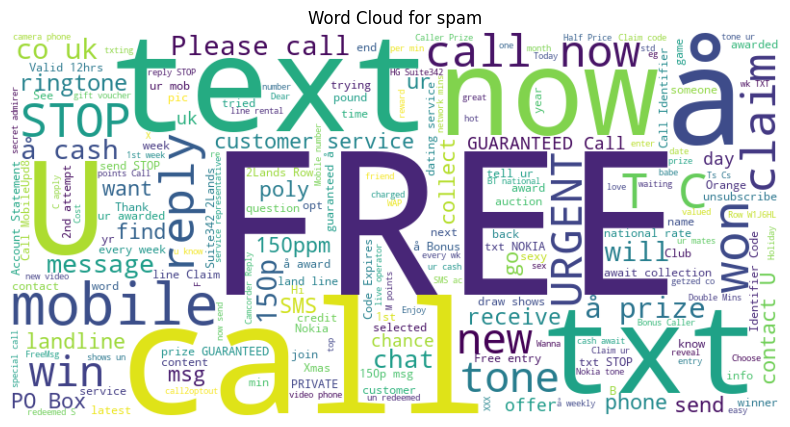

In [7]:
plot_wordcloud('ham')
plot_wordcloud('spam')

In [8]:
# 3. Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(preprocess)

In [9]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


In [10]:
# 4. Feature Extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['label'].map({'ham':0, 'spam':1})

In [14]:
print(X[:5]) 

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 52 stored elements and shape (5, 8847)>
  Coords	Values
  (0, 3590)	0.1550855880298003
  (0, 4435)	0.34897083476079455
  (0, 6041)	0.23828466398999681
  (0, 2389)	0.2702538894639591
  (0, 1378)	0.265364095674063
  (0, 1814)	0.29481197139266213
  (0, 3681)	0.1942323136391732
  (0, 8583)	0.2371521973992585
  (0, 4584)	0.29481197139266213
  (0, 1812)	0.33313038268477546
  (0, 2125)	0.29481197139266213
  (0, 3643)	0.16394005641748216
  (0, 1154)	0.34897083476079455
  (0, 8364)	0.1989735621482012
  (1, 5637)	0.2741803362458879
  (1, 4620)	0.4080505634471753
  (1, 4405)	0.5233273701797004
  (1, 8488)	0.4313385731102942
  (1, 5668)	0.5462557824449175
  (2, 3396)	0.11510338496702874
  (2, 3008)	0.35735556247970746
  (2, 8539)	0.18914999386854767
  (2, 2233)	0.19525144031379238
  (2, 8501)	0.1458819488108309
  (2, 3139)	0.4663141756607755
  :	:
  (2, 7832)	0.2191895088082265
  (2, 450)	0.22529095525347123
  (2, 5029)	0.15911047892886

In [11]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# 6. Model Training & Evaluation
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': LinearSVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))



Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       966
           1       0.99      0.61      0.76       149

    accuracy                           0.95      1115
   macro avg       0.97      0.80      0.86      1115
weighted avg       0.95      0.95      0.94      1115


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg     

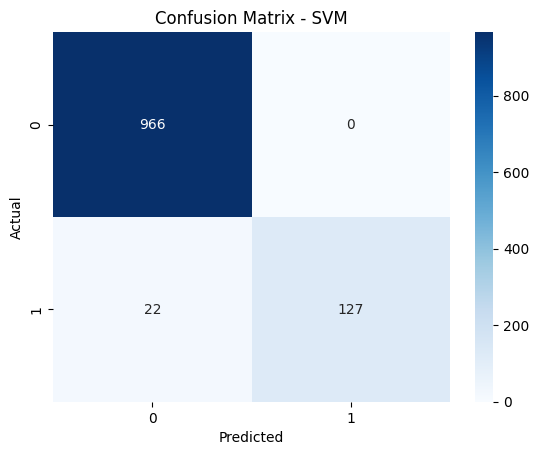

In [16]:
# Display confusion matrix for best model (by F1)
best_model = max(results, key=lambda x: results[x]['f1'])
cm = results[best_model]['confusion_matrix']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()